In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
plt.rc('font', **font)


In [2]:
def extract_loss(input_csv_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_csv_path)

    # Extract only the columns containing loss functions (excluding MIN and MAX)
    loss_columns = [col for col in df.columns if 'loss' in col.lower() and 'MIN' not in col and 'MAX' not in col]

    # Create a new DataFrame with only the relevant columns
    df_loss = df[['Step'] + loss_columns]

    return df_loss

def extract_loss_val(input_csv_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_csv_path)

    # Extract only the columns containing loss functions (excluding MIN and MAX)
    loss_columns = [col for col in df.columns if 'loss_val' in col.lower() and 'MIN' not in col and 'MAX' not in col]

    # Create a new DataFrame with only the relevant columns
    df_loss = df[['Step'] + loss_columns]

    return df_loss

In [3]:
def plot_loss_val(df_loss_val, dpi=100, figsize=(10, 6), legend_fontsize=10, save_path=None):
    # Set DPI and figsize
    plt.figure(dpi=dpi, figsize=figsize)

    # Plot loss values
    plt.plot(df_loss_val['Step'], df_loss_val.iloc[:, 1:], label=df_loss_val.columns[1:])
    plt.ylabel('Loss Value')
    plt.xlabel('Steps')
    plt.title('Loss Values over Steps')
    plt.legend(fontsize=legend_fontsize)
    plt.grid()

    # Save the figure if a save_path is provided
    if save_path:
        plt.savefig(save_path)

    # Show the plot
    plt.show()

In [4]:

def plot_loss_functions(df_loss, dpi=100, figsize=(10, 6), legend_fontsize=10, save_path=None, type_of_loss='Loss'):
    # Set DPI and figsize
    plt.figure(dpi=dpi, figsize=figsize)

    # Create the first subplot without a logarithmic scale on the y-axis
    plt.subplot(2, 1, 1)
    for column in df_loss.columns[1:]:
        plt.plot(df_loss['Step'], df_loss[column], label=column)
    plt.ylabel(f'{type_of_loss}')
    plt.xlabel('Steps')
    plt.title(f'{type_of_loss} Functions over Steps')
    plt.legend(fontsize=legend_fontsize)
    plt.grid()
    
    # Create the second subplot with a logarithmic scale on the y-axis
    plt.subplot(2, 1, 2)
    for column in df_loss.columns[1:]:
        plt.plot(df_loss['Step'], df_loss[column], label=column)
    plt.yscale('log')  # Set y-axis to log scale
    plt.ylabel('Logarithmic Loss Value')
    plt.title(f'{type_of_loss} over Steps (Logarithmic Scale)')
    plt.legend(fontsize=legend_fontsize)
    plt.grid()
    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Save the figure if a save_path is provided
    if save_path:
        plt.savefig(save_path)

    # Show the plot
    plt.show()

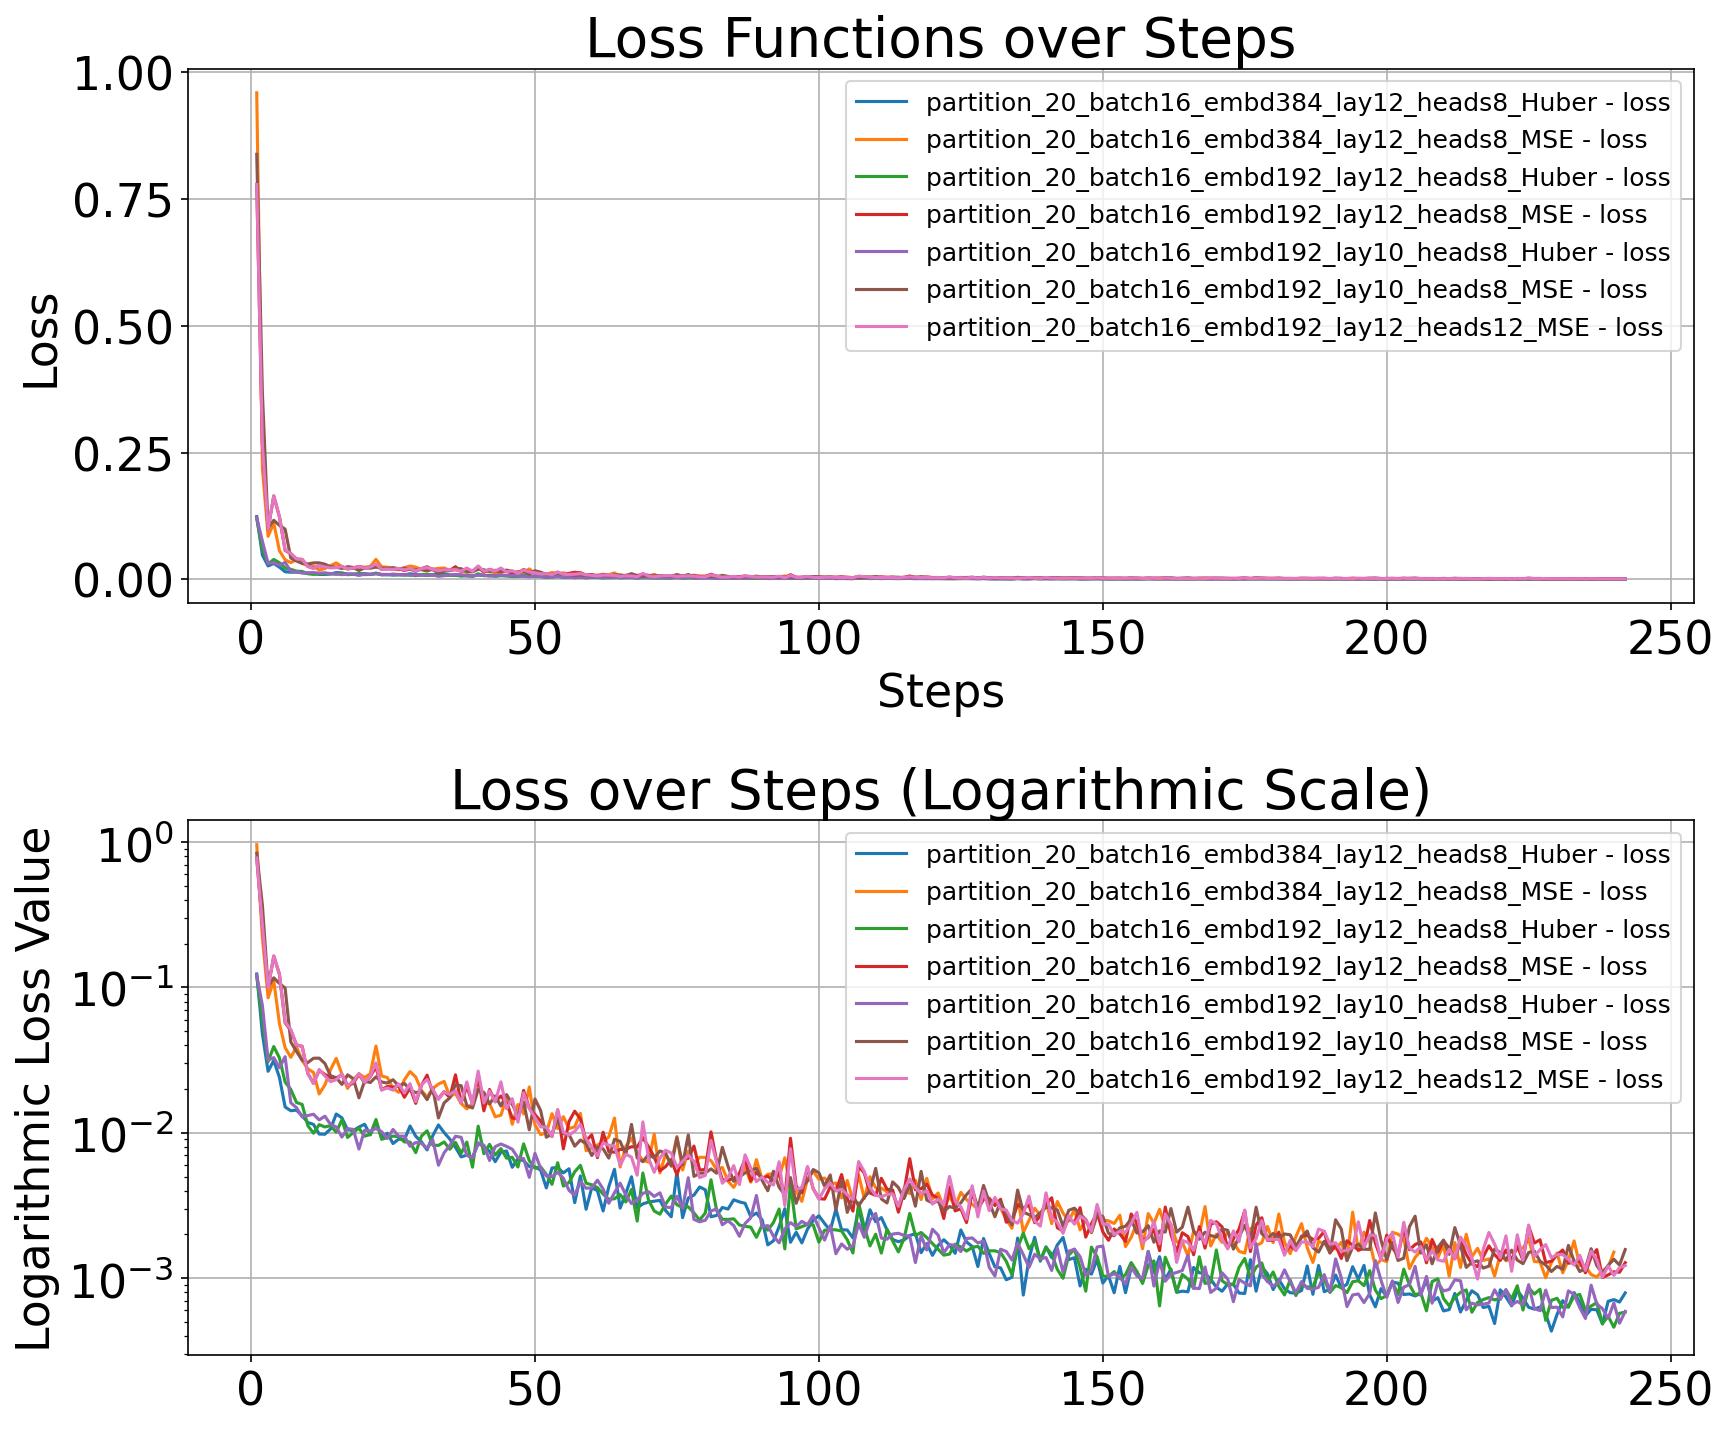

In [5]:
# Example usage with saving the figure
input_csv_path = 'Loss_ds2_wandb.csv'
df_loss = extract_loss(input_csv_path)
output_fig_path = 'loss_ds2_plot.png'
plot_loss_functions(df_loss, dpi=150, figsize=(12, 10), legend_fontsize=12, save_path=output_fig_path, type_of_loss='Loss')


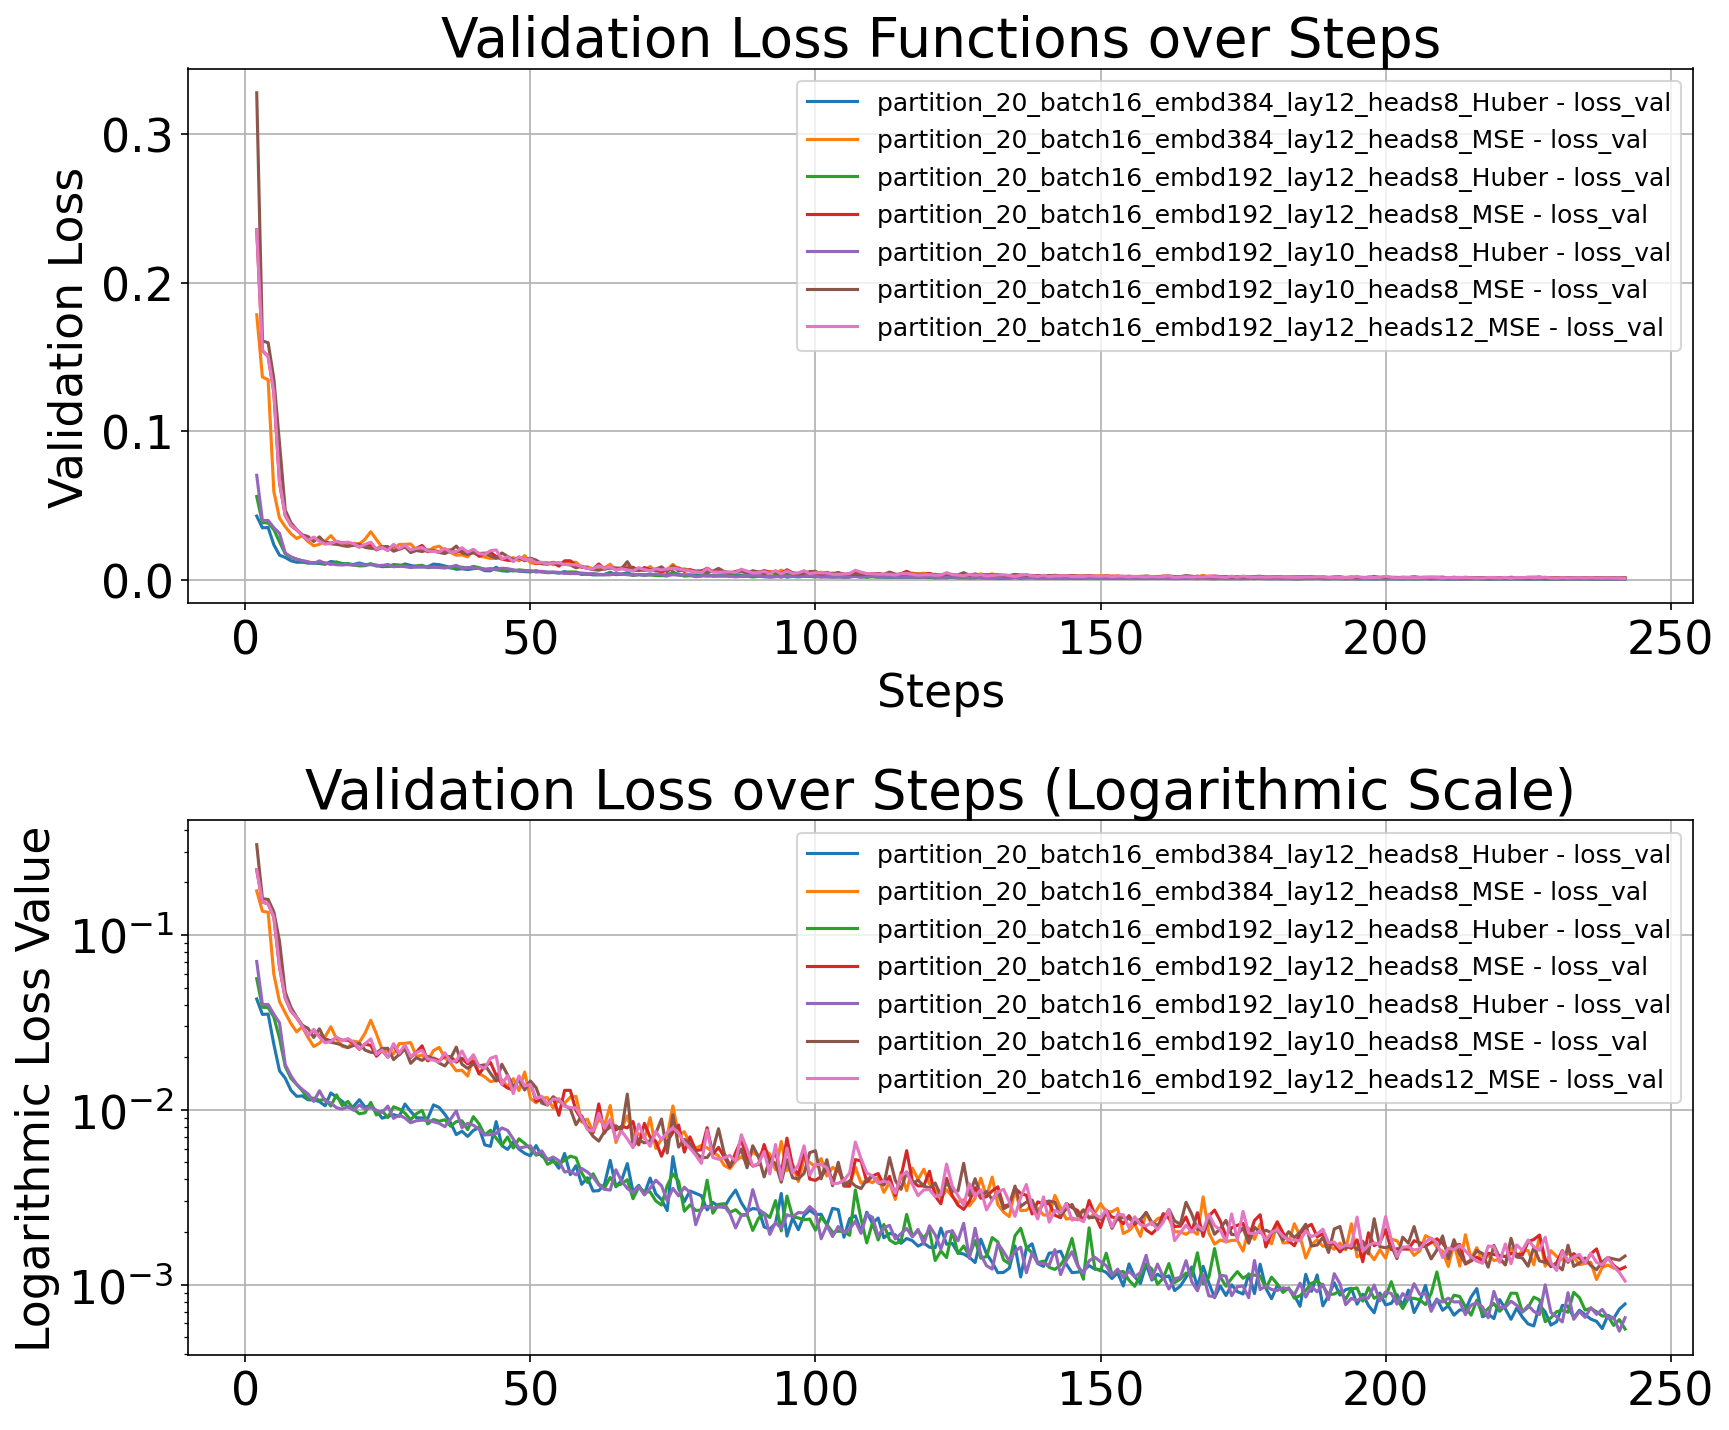

In [6]:
# Example usage for df_loss_val
input_csv_path_val = 'Loss_val_ds2_wandb.csv'
df_loss_val = extract_loss_val(input_csv_path_val)
output_fig_path_val = 'loss_val_ds2_plot.png'
plot_loss_functions(df_loss_val, dpi=150, figsize=(12, 10), legend_fontsize=12, save_path=output_fig_path, type_of_loss='Validation Loss')
